## Image Compression using SVD

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt 
import numpy as np
import os

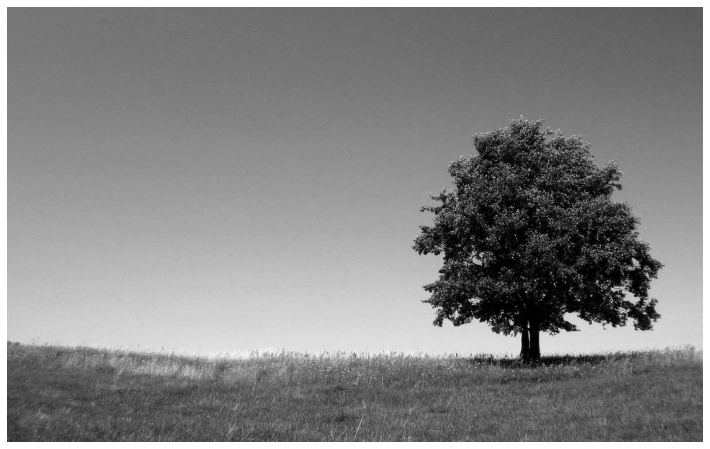

(1200, 1920)


In [2]:
plt.rcParams['figure.figsize']=[16,8]
A= imread('tree.jpg')
X= np.mean(A,-1)
img=plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()
print(X.shape)

In [3]:
U,S,VT= np.linalg.svd(X)

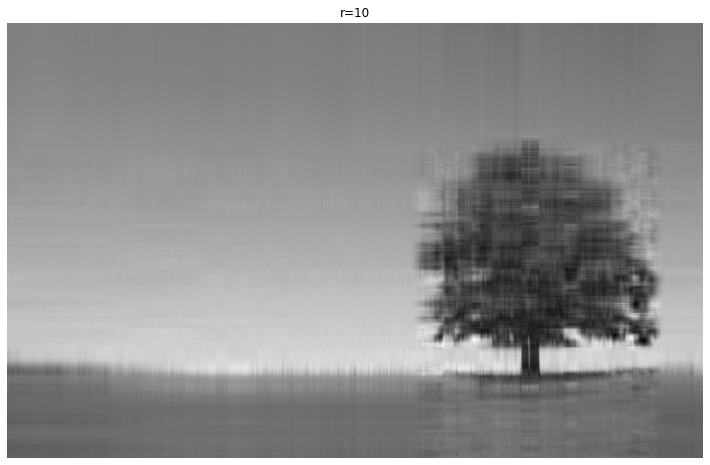

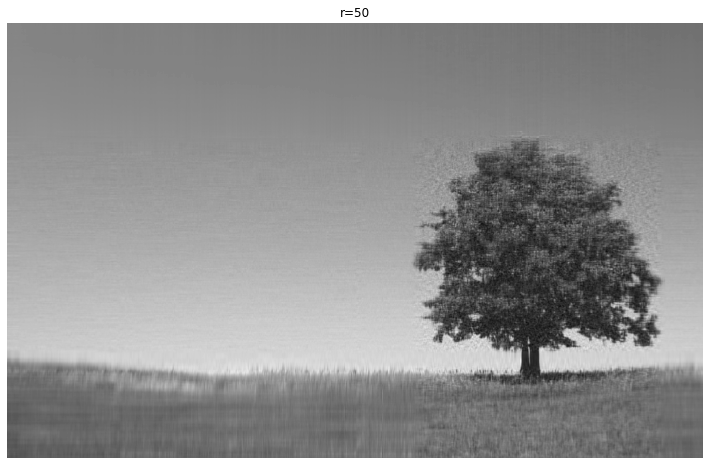

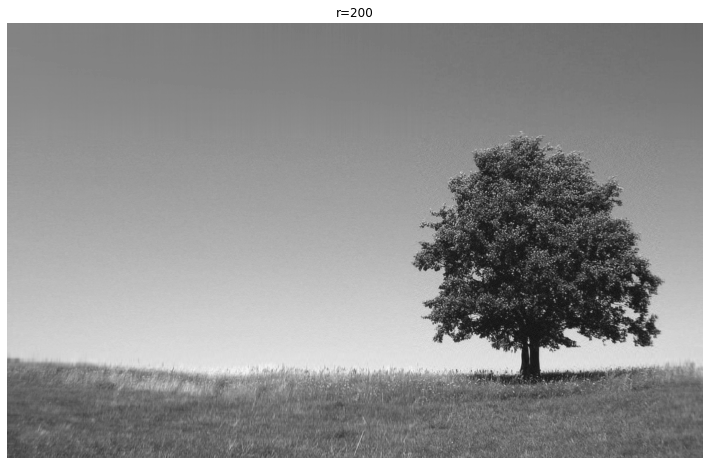

In [4]:
S=np.diag(S)
j=0
for r in(10,50,200):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j+=1
    img=plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()

## Image Compression using FFT

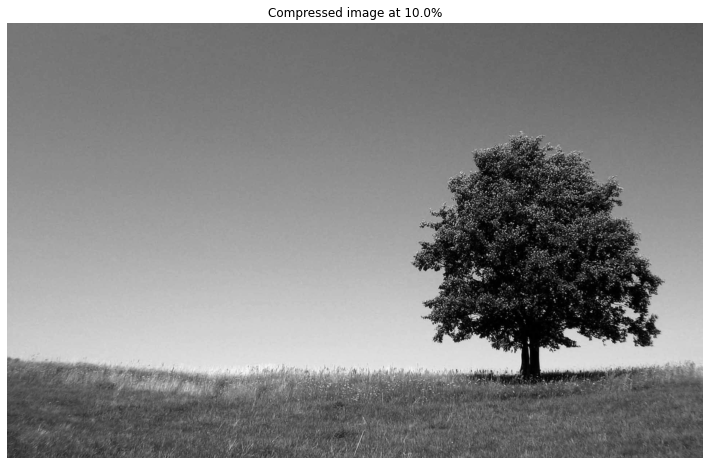

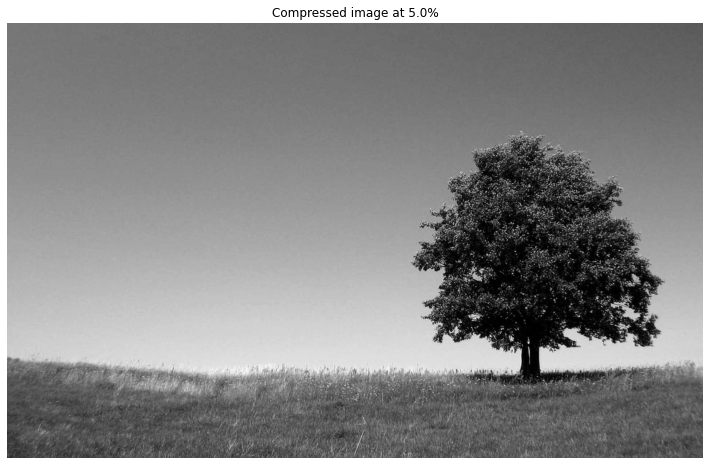

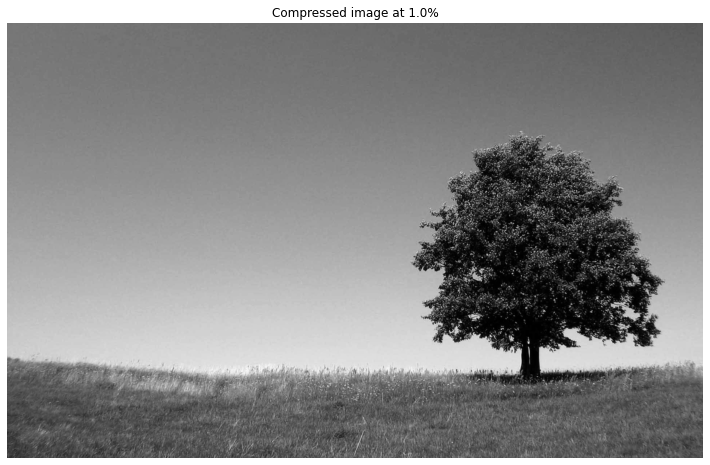

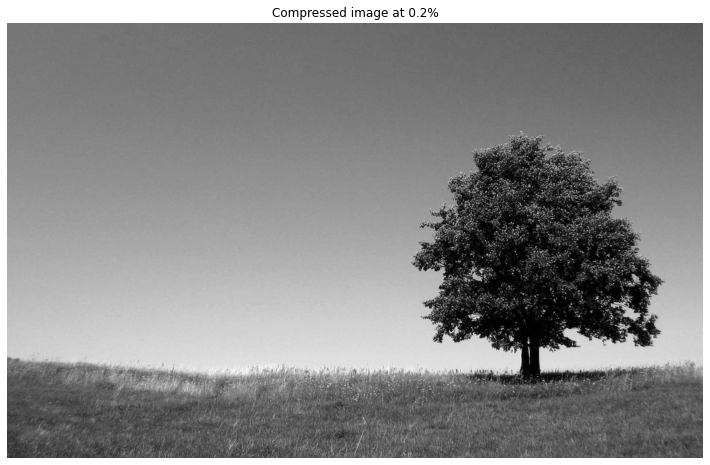

In [5]:
Xt= np.fft.fft2(X) # 2d fft
Xtsort= np.sort(np.abs(Xt.reshape(-1)))# sorting the modes in descending order.

for keep in(0.1,0.05,0.01,0.002):
    thresh=Xtsort[int(np.floor(1-keep)*len(Xtsort))]#setting threshold limit. Modes above threshold to be kept
    ind= np.abs(Xt)>thresh
    Atlow=Xt*ind
    Alow=np.fft.ifft2(Atlow).real #inverse fourier transform
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title("Compressed image at "+str(keep*100)+"%")

## Image Compression using Wavelet Transform

In [6]:
import pywt

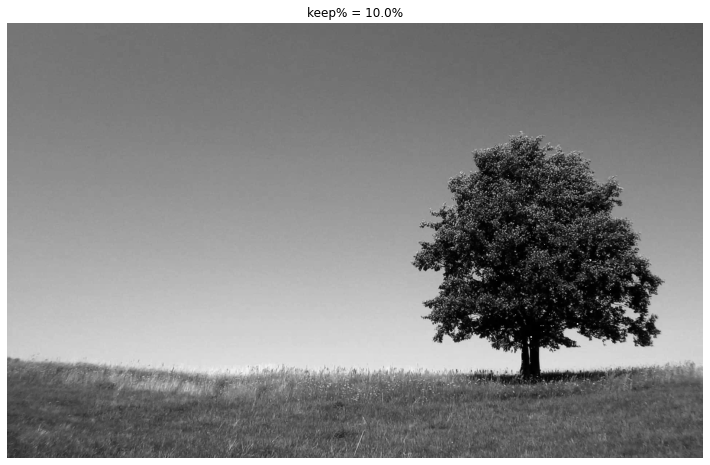

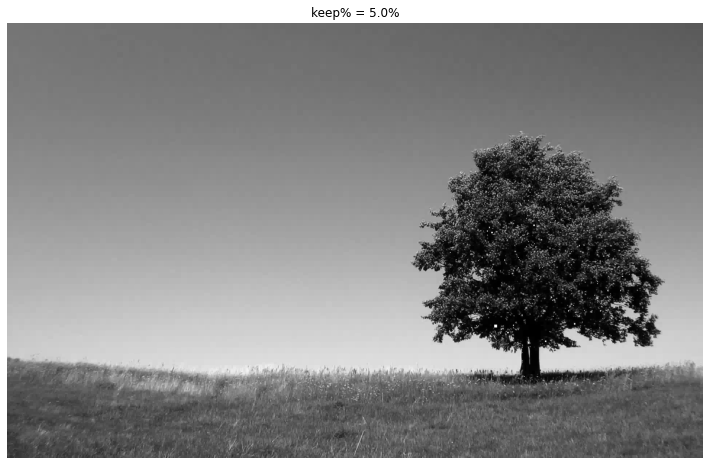

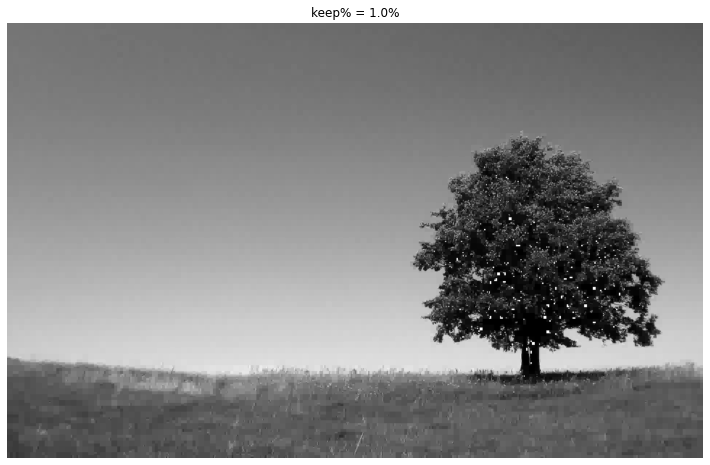

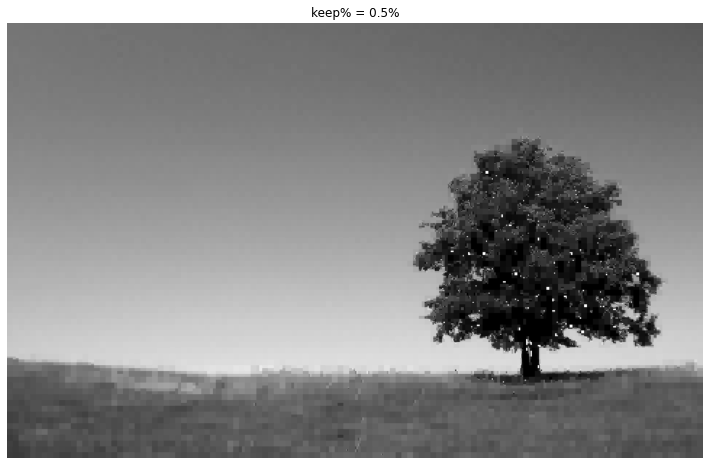

In [8]:
n = 4
w = 'db1'
coeffs = pywt.wavedec2(X,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005): # fraction of wavelet modes to be retained
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep% = ' + str(keep*100)+"%")